In [172]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

loading the dataset

In [173]:
df = pd.read_csv('loan_approval_dataset.csv')

In [174]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## looking at the dataset

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [176]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [177]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

no nan values yay 

In [178]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

we do have quite alot of rejected examples but i'd like some more to improve accuracy

actually i have decided to check how sampling effectes the accuracy too

## cleaning the data

mapping catagorical values to numerical values

In [179]:
label_encoder = preprocessing.LabelEncoder() 

catagorical_cats_tr = [' education', ' self_employed', ' loan_status']

for col in catagorical_cats_tr:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Print the mapping
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Column: {col}")
    print("Mapping:", mapping)
    print()

Column:  education
Mapping: {' Graduate': 0, ' Not Graduate': 1}

Column:  self_employed
Mapping: {' No': 0, ' Yes': 1}

Column:  loan_status
Mapping: {' Approved': 0, ' Rejected': 1}



In [180]:
df = df.drop(columns=['loan_id'])

In [181]:
for i,col in enumerate(df.columns):
    print(i)
    print(col)

0
 no_of_dependents
1
 education
2
 self_employed
3
 income_annum
4
 loan_amount
5
 loan_term
6
 cibil_score
7
 residential_assets_value
8
 commercial_assets_value
9
 luxury_assets_value
10
 bank_asset_value
11
 loan_status


In [198]:
def plot_distributions(df):
    
    # calculating how many rows needed for the subplot 
    n_cols = len(df.columns)
    n_rows = (n_cols // 3 + (n_cols % 3 > 0))

    # creating the subplot 
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # using flatten, flattens the axis array for easy indexing 

    # loops through all cols and makes a plot based on the type of data 
    for i, col in enumerate(df.columns):
        ax = axes[i]

        # catagorical columns 
        if col in [' no_of_dependents', ' education', ' self_employed', ' loan_status', ' loan_term']:
            df[col].value_counts().plot(kind='bar', ax=ax, color='purple', alpha=0.7)
            ax.set_title(f"Bar Plot of {col}")

        # numerical columns
        else:
            sns.histplot(df[col], kde=True, ax=ax, color='teal', bins=30, alpha=0.7)
            ax.set_title(f"Distribution of {col}")

        # adding a grid on the yaxis for readability and aesthetics 
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # adjusting layout
    plt.tight_layout()
    plt.show()


In [196]:
# drop this col as its useless 
df = df.drop(columns=['loan_id'], errors='ignore')

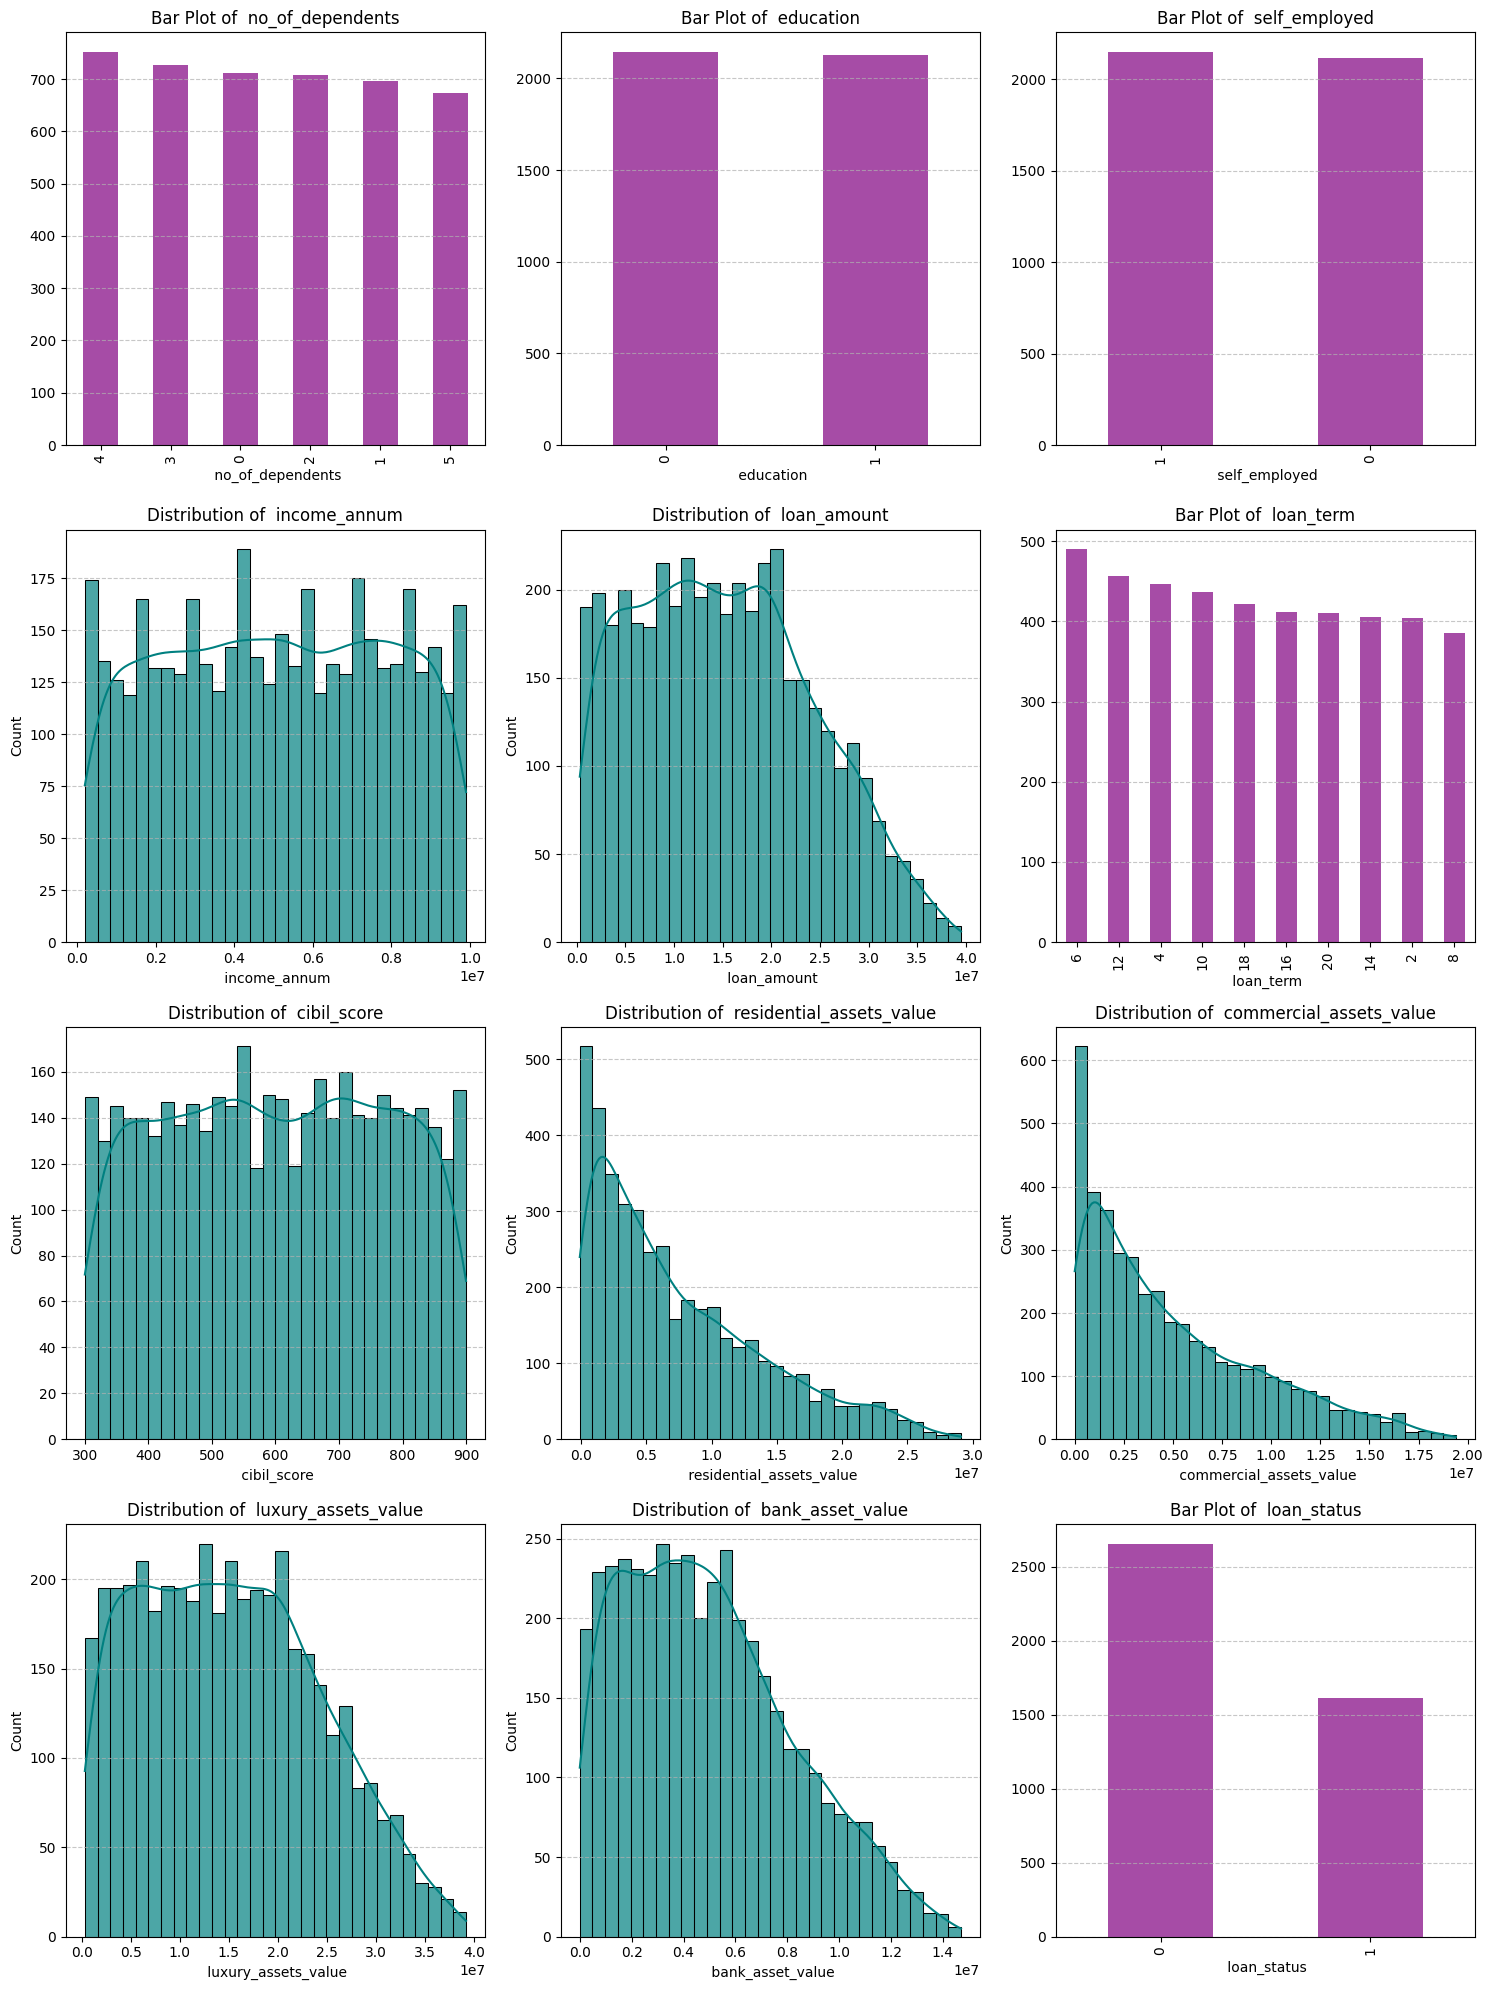

In [199]:
plot_distributions(df)

In [200]:
def loan_status_comparison_kde_all(features):

    # calculating how many rows needed 
    n_features = len(features)
    n_rows = (n_features // 2 + (n_features % 2 > 0)) 

    # creating subplots and using flatten to make indexing axis array easier 
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 5))
    axes = axes.flatten()  

    # looping through features and plotting kde 
    for i, feature in enumerate(features):
        ax = axes[i]

        sns.kdeplot(data=df, x=feature, hue=' loan_status', fill=True, palette='Set2', alpha=0.5, ax=ax)

        ax.set_xlim(0, df[feature].quantile(0.999))  # makes so the axis is fit appropriatly for each col

        # setting title, labels, legend, and grid 
        ax.set_title(f'Loan Default vs {feature} (KDE)', fontsize=14)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.legend(title='Loan Default', labels=['No Default', 'Default'])
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


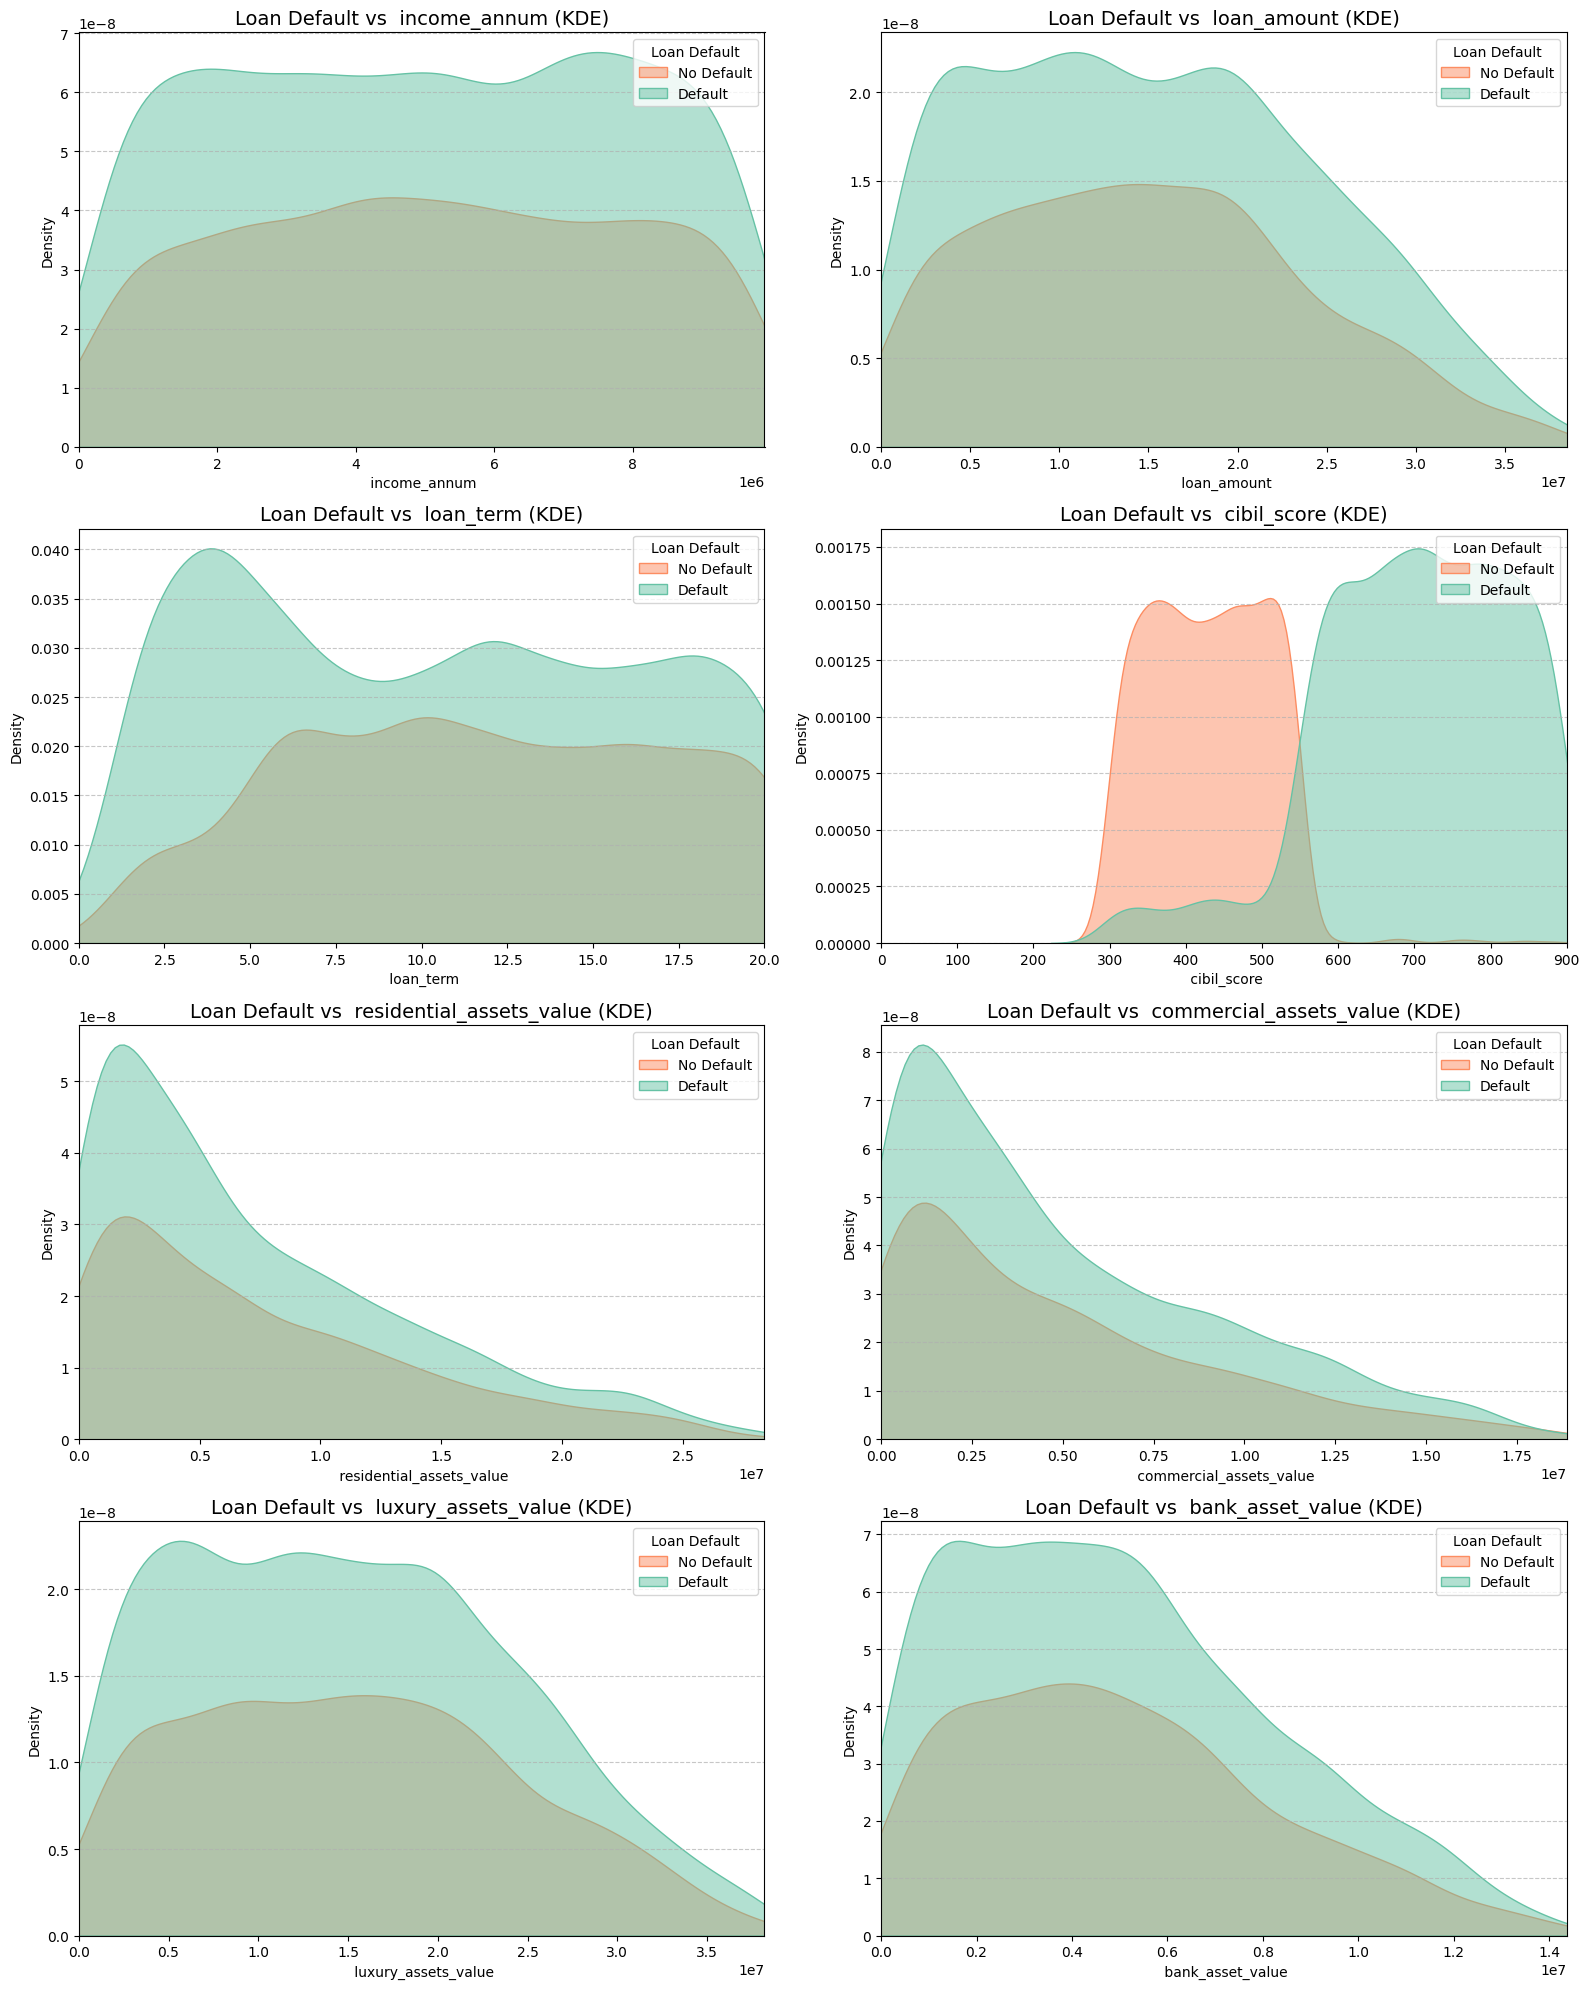

In [201]:
# numerical features to plot
features = [' income_annum', ' loan_amount', ' loan_term', ' cibil_score', 
    ' residential_assets_value', ' commercial_assets_value', 
    ' luxury_assets_value', ' bank_asset_value']

loan_status_comparison_kde_all(features)

- income per anum is spread quite widely 
- loan amount has majority of its density < 2.25 (roughly from just looking)
- loan term has more of its density focuses towards longer terms 
- credit scores are very very dense around 250-600 (almost entirely all defaults)
- all of the assets are much more dense towards lower values but luxury and bank are far more spread out

In [125]:
def loan_status_comparison_bar_all(features):

    # calculating number of rows needed 
    n_features = len(features)
    n_rows = (n_features // 2 + (n_features % 2 > 0))  

    # making subplots and flattening axes for easier axis array indexing 
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 5))
    axes = axes.flatten()  

    for i, feature in enumerate(features):
        ax = axes[i]

        # group data by feature and loan data 
        grouped_data = df.groupby([feature, ' loan_status']).size().reset_index(name='count')
        
        # plot barplot 
        sns.barplot(data=grouped_data, x=feature, y='count', hue=' loan_status', palette='Set2', ax=ax)
        
        # setting titles, labels, legend, and grid
        ax.set_title(f'Loan Status vs {feature}', fontsize=14)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.legend(title='Loan Status', labels=['No Default (0)', 'Default (1)'])
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

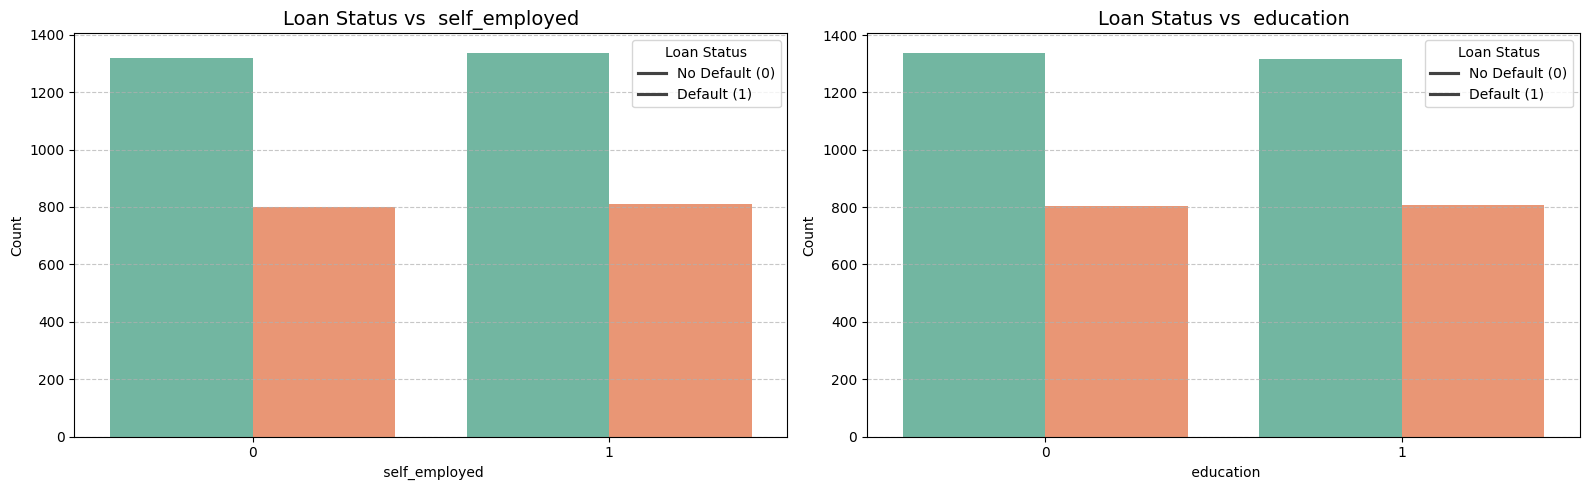

In [ ]:
features = [' self_employed', ' education']
loan_status_comparison_bar_all(features)

note:

Column:  education
Mapping: {' Graduate': 0, ' Not Graduate': 1}

Column:  self_employed
Mapping: {' No': 0, ' Yes': 1}

- defualt comparrison between employed v self employed and graduate v non graduate is very equal 

## correlation matrix

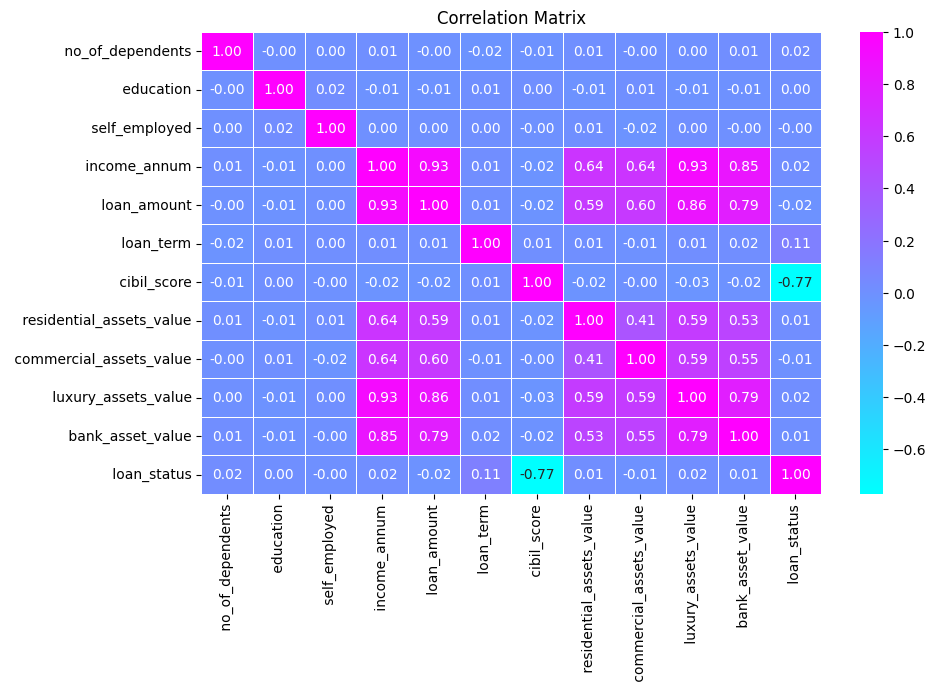

In [127]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- loan status has very stong negative correlation with credit score 
- all the different asset values are all positively correlated 
- income and loan amount have very strong positive correlation

## splitting the data set

In [128]:
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

### resampled sets 

In [131]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [132]:
print("Before Oversampling:", y.value_counts())
print("After Oversampling:", pd.Series(y_resampled).value_counts())

Before Oversampling:  loan_status
0    2656
1    1613
Name: count, dtype: int64
After Oversampling:  loan_status
0    2656
1    2656
Name: count, dtype: int64


In [133]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=123)

In [134]:
models = [RandomForestClassifier(random_state=123, n_estimators=100), LogisticRegression(random_state=123, max_iter=1000), 
          DecisionTreeClassifier(random_state=123)]

# non resampled sets 

-----------------

Model 1: RandomForestClassifier
Training Accuracy (no resampling): 1.0
Testing Accuracy (no resampling): 0.9836065573770492



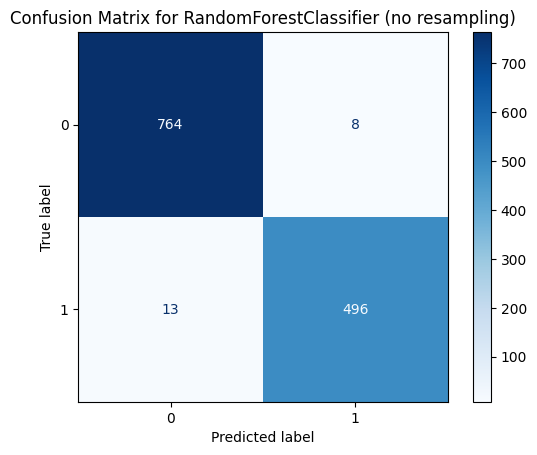


Classification Report (no resampling):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       772
           1       0.98      0.97      0.98       509

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

-----------------

-----------------

Model 2: LogisticRegression
Training Accuracy (no resampling): 0.7931726907630522
Testing Accuracy (no resampling): 0.7946916471506635



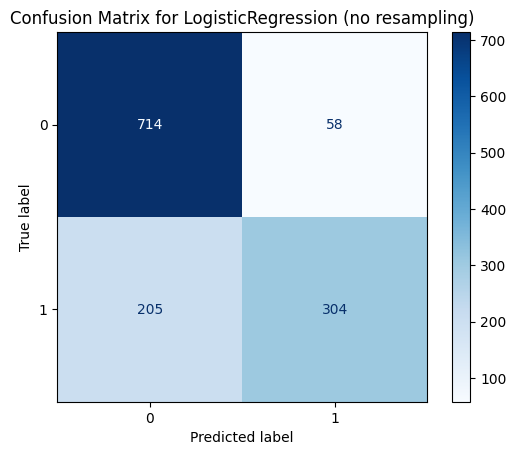


Classification Report (no resampling):
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       772
           1       0.84      0.60      0.70       509

    accuracy                           0.79      1281
   macro avg       0.81      0.76      0.77      1281
weighted avg       0.80      0.79      0.79      1281

-----------------

-----------------

Model 3: DecisionTreeClassifier
Training Accuracy (no resampling): 1.0
Testing Accuracy (no resampling): 0.9797033567525371



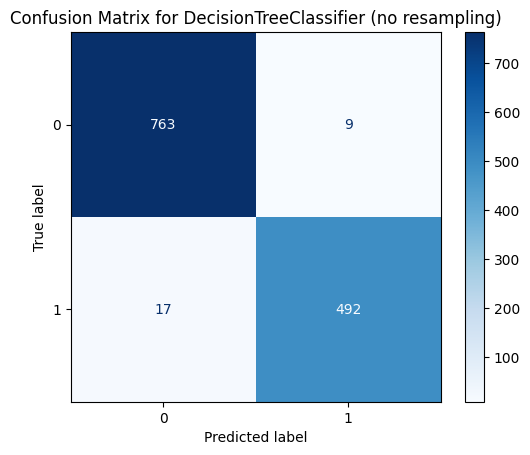


Classification Report (no resampling):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       772
           1       0.98      0.97      0.97       509

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

-----------------



In [202]:
for i, model in enumerate(models):
    
    model.fit(X_train1, y_train1)

    train_accuracy = accuracy_score(y_train1, model.predict(X_train1))
    test_accuracy = accuracy_score(y_test1, model.predict(X_test1))   

    y_pred1 = model.predict(X_test1)
    cm = confusion_matrix(y_test1, y_pred1)
    class_report = classification_report(y_test1, y_pred1)

    print("-----------------\n")
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy (no resampling): {train_accuracy}")
    print(f"Testing Accuracy (no resampling): {test_accuracy}")
    print()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {type(model).__name__} (no resampling)')
    plt.show()
    print("\nClassification Report (no resampling):")
    print(class_report)
    print("-----------------\n")

- we can see that rfc and decision tree are the most accurate and logistic regression does not perform nearly as well
- rfc and decision tree have near perfect testing accuracy while logistic regression has approx 79.5%

Best model saved
-----------------

Model 1: RandomForestClassifier
Training Accuracy (resampling): 1.0
Testing Accuracy (resampling): 0.9887076537013801



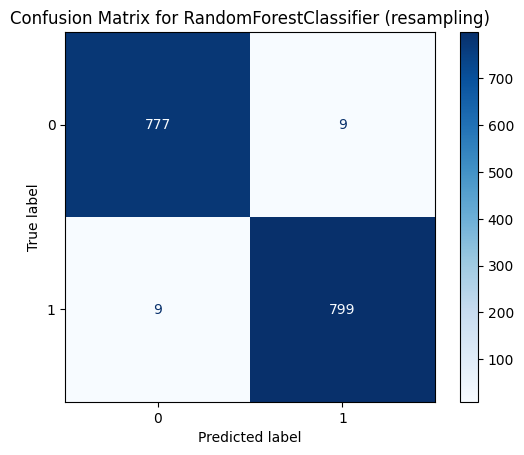


Classification Report (resampling):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       786
           1       0.99      0.99      0.99       808

    accuracy                           0.99      1594
   macro avg       0.99      0.99      0.99      1594
weighted avg       0.99      0.99      0.99      1594

-----------------

-----------------

Model 2: LogisticRegression
Training Accuracy (resampling): 0.7673480365788058
Testing Accuracy (resampling): 0.7603513174404015



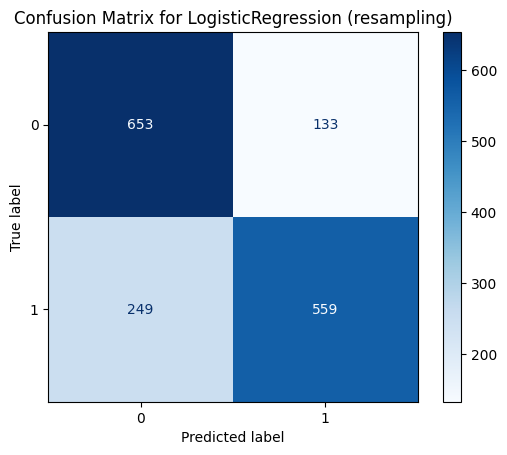


Classification Report (resampling):
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       786
           1       0.81      0.69      0.75       808

    accuracy                           0.76      1594
   macro avg       0.77      0.76      0.76      1594
weighted avg       0.77      0.76      0.76      1594

-----------------

-----------------

Model 3: DecisionTreeClassifier
Training Accuracy (resampling): 1.0
Testing Accuracy (resampling): 0.9830614805520702



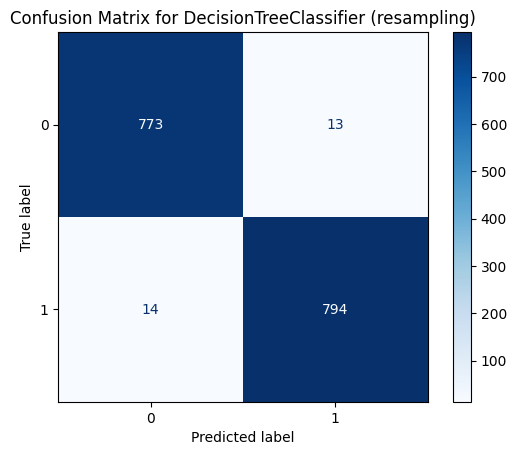


Classification Report (resampling):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       786
           1       0.98      0.98      0.98       808

    accuracy                           0.98      1594
   macro avg       0.98      0.98      0.98      1594
weighted avg       0.98      0.98      0.98      1594

-----------------



In [136]:
for i, model in enumerate(models):
    
    model.fit(X_train2, y_train2)

    if isinstance(model, RandomForestClassifier):
        joblib.dump(model, 'approval_pred_best_model.pkl')
        print('Best model saved')

    train_accuracy = accuracy_score(y_train2, model.predict(X_train2))
    test_accuracy = accuracy_score(y_test2, model.predict(X_test2))   

    y_pred2 = model.predict(X_test2)
    cm = confusion_matrix(y_test2, y_pred2)
    class_report = classification_report(y_test2, y_pred2)

    print("-----------------")
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy (resampling): {train_accuracy}")
    print(f"Testing Accuracy (resampling): {test_accuracy}")
    print()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {type(model).__name__} (resampling)')
    plt.show()
    print("\nClassification Report (resampling):")
    print(class_report)
    print("-----------------")
    print()

- we can see that resampling has a positive impact on the testing accuracy for rfc and decision tree - 
    -  rfc goes from 98.36% to 98.87%
    - decision tree goes from 97.97 to 98.31
- logistic regression drops approx 3% in training and testing accuracy

- precision scores for rfc go from 0.98 to 0.99
- decision tree maintains its precision score
- logistic regression has a fairly significant drop in precision score

- overall best model is the random forest classifier 